In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import layers

from keras.datasets import mnist

In [29]:
# 데이터 불러오기

(x_train, _), (x_test, _) = mnist.load_data()
# y_train, y_test 사용 안함
# 이미지 데이터 구성 (이미지, 라벨)
# 여기서는 이미지만 사용

In [30]:
# 0과 1사이(0-1) 로 정규화

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [31]:
print(len(x_train))
print(len(x_test))
# 훈련용 이미지 60000, 테스트용 이미지 10000

60000
10000


In [32]:
x_train.shape
# 28*28 크기의 이미지 60000장

(60000, 28, 28)

In [33]:
x_train.shape[1:] #이미지 크기 (2차원)

(28, 28)

In [34]:
# np.prod(x_train.shape[1:]) (1차원)
# 28*28= 784 / prod() 주어진 배열이나 튜플의 모든 요소 곱하기

In [35]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [36]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

autoencoder 모델 생성

In [37]:
# encoding 되는 차원 수
encoding_dim = 32

#input layer
input_img = keras.Input(shape=(784, ))
# 784 >> 1차원으로 들어감

# hidden layer(784 차원 >> 32 차원)
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# Dense(): 1차원

# output layer(32차원 >> 784차원)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# 왜 784차원으로 나오면 다중 분류니깐 softmax 써야 되는 거 아니예요?
# 일반적으로 다중분류는 softmax.
# 오토인코더는 복원하는 인공지능 기법 (출력값은 0 또는 1사이로 제한)

# autoencoder model
autoencoder = keras.Model(input_img, decoded)

In [38]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


autoencdoer 학습

In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 적합 (training, fitting)

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 왜 x_train을 두 번 넣나요?
# 앞의 x_train 입력값, 뒤의 x_train 출력값
# 입력데이터와 출력데이터가 동일한 자기 지도 학습
# >>> 복원하는 과정에서 중요한 특징을 추출하기 위해

Epoch 1/20
235/235 [==============================] - 5s 18ms/step - loss: 0.2772 - val_loss: 0.1857
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1686 - val_loss: 0.1521
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1434 - val_loss: 0.1333
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1280 - val_loss: 0.1204
Epoch 5/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1174 - val_loss: 0.1120
Epoch 6/20
235/235 [==============================] - 5s 21ms/step - loss: 0.1103 - val_loss: 0.1064
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1055 - val_loss: 0.1022
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1019 - val_loss: 0.0992
Epoch 9/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0993 - val_loss: 0.0971
Epoch 10/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0975 - val_lo

In [40]:
# 학습 결과 확인

decoded_imgs = autoencoder.predict(x_test)
decoded_imgs

313/313 [==============================] - 1s 3ms/step


array([[2.0139343e-08, 1.4790064e-08, 7.2885209e-09, ..., 1.2518142e-08,
        1.6945641e-08, 4.0715951e-09],
       [1.8240808e-11, 8.3448227e-11, 2.3449745e-10, ..., 4.8111508e-11,
        1.0063704e-10, 6.0218219e-10],
       [7.5837232e-07, 5.2274913e-07, 1.4675829e-06, ..., 3.2426940e-06,
        2.0146872e-06, 4.7620591e-07],
       ...,
       [1.6304980e-12, 7.3072559e-13, 1.7519436e-12, ..., 7.0803552e-13,
        2.8496725e-13, 4.7551123e-13],
       [8.1869789e-11, 7.1258846e-11, 3.3457771e-11, ..., 3.7383621e-11,
        1.1854611e-11, 3.1473137e-11],
       [1.2167056e-17, 7.2114614e-19, 6.6951589e-18, ..., 1.0157849e-18,
        2.4652378e-19, 7.7465481e-18]], dtype=float32)

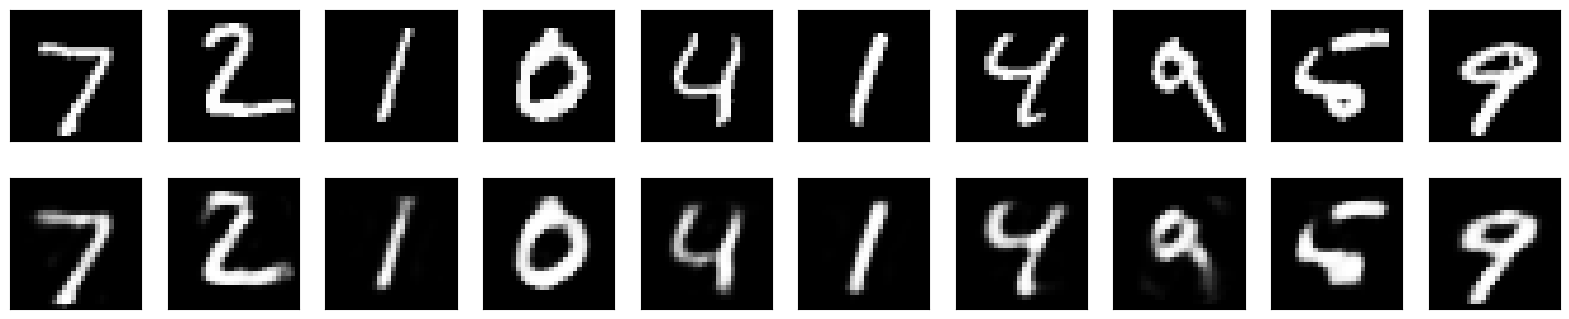

In [42]:
n = 10

plt.figure(figsize=(20,4))
for i in range(n):
    # display original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction (복원된 이미지)
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28)) #2차원 이미지로 복원
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()